In [6]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install kneed


In [14]:
# !jt -t gruvboxd -T -nfs 10 -ofs 12
# !jt -t gruvboxd -tfs 14 -nfs 115 -cellw 80% -T -cursc r -cursw 5 -dfs 8 -N
!jt -r

Reset css and font defaults in:
/home/tlac980/.jupyter/custom &
/home/tlac980/.local/share/jupyter/nbextensions


In [15]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## PEARL

Probabilistic Exact Adaptive Random Forest with Lossy Counting

Data streams are infinite sequences of items, with a temporal order.
#### Problems with Data Streams
* Stream data is large and fast, therefore we need to extract information in _real time_.
* Stream data may be evolving, so our models have to adapt when there are _changes_ in the data.
        warning: awesomeness ahead

### PEARL Architecture

<img src="img/architecture.svg"  class=filter-invert width="1200" height="1200">

### Probabilistic Graphical Model

<center><img src="img/graph.svg"  class=filter-invert width="800" height="800"/></center>

### Lossy Counting

The Lossy Counting algorithm computes _approximate frequency counts_ of elements in a data stream.

Its key idea is _NOT_ to keep the items with _very low frequency_. This can mitigate the side effects from wrong tree transitions!

<img src="img/lossy-count.svg"  class=filter-invert width="1200" height="1200">

### Case Study: Monitoring Gas Sensors

#### Data Set Information

* This dataset has recordings of a gas sensor array composed of 8 MOX gas sensors, and a temperature and humidity sensor.
* This sensor array was exposed to background home activity while subject to two different stimuli: wine and banana.
* Goal: discriminate among background, wine and banana.

<IPython.core.display.Javascript object>


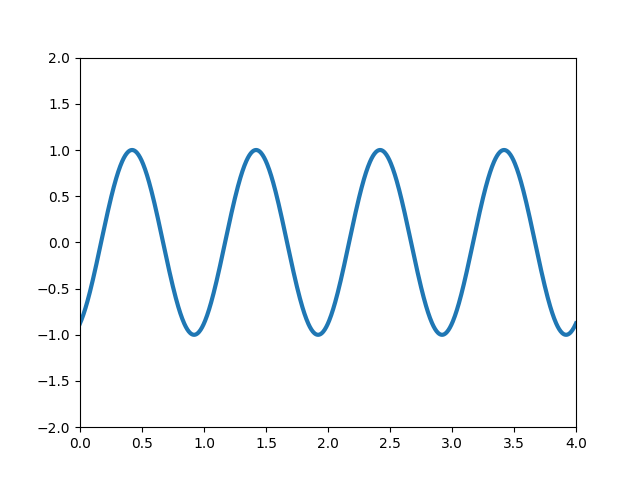

In [3]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
#from jupyterthemes import jtplot
#jtplot.style()

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

## Covtype Results


<img src="img/covtype-results.svg" class="filter-invert" width="1200" height="1200">


### scikit-ika

TODO: LOGO

A lifelong real-time adaptive predictive system for evolving data streams. Inspired by scikit-multiflow, following Scikit's philosophy.

In [5]:
pip install scikit-ika

Note: you may need to restart the kernel to use updated packages.


In [6]:
import skika
print(f"Hello {skika.__name__}")

Hello skika


# Questions

# Hyper-parameters tuning with Meta-learning


- Hyper-parameter tuning : choosing values fot the parameters for an algorithm. 
Task especially complicated for data streams as good values for parameters might change when a drift happens. 


- Meta-learning : accumulating knowledge of a learning system performance on multiple tasks to adapt to new tasks faster than starting from scratch.

First step : building the meta-knowledge.

<img src="img/MetaL1.png" width="600" height="600" align="center"/>


Second step : using knowledge to recommend setting for the target task. 

<img src="img/MetaL2.png" width="600" height="600" align="center"/>

## Meta-learning process for changing data streams

<img src="img/OverviewProcess.png" class="filter-invert" width="1000" height="1000" align="center"/>

## Tuning the number of trees in the Adaptive Random Forest

### Goal  
Tune the number of trees to get a compromise between classification performance and resource consumption. 

Tuning based on the percentage of redundant features (corr>0.8) in the data. 



### Building the knowledge 

- Get performances of a set of hyper-parameters settings evaluaeted on several datasets; 

- Pareto efficiency and knee detection used to select settings with a good compromise between classification performances (Kappa metric) and resource consumption (RAM/hours). 



<IPython.core.display.Javascript object>


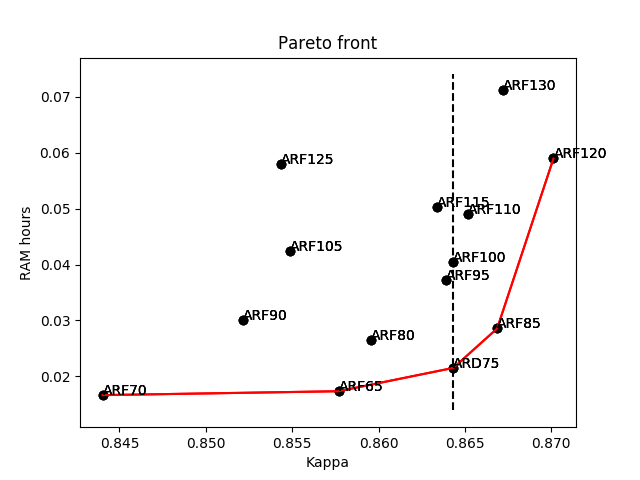

In [3]:
%matplotlib notebook

from demo_pareto import DemoPareto 

demo = DemoPareto()
demo.plot_data()

In [4]:
demo.draw_pareto()

In [5]:
demo.draw_knee()

## Adaptive tuning demo

## What is next
- Extension to tune drift detectors
- Make knowledge adaptive 
- Bring together with PEARL

# Questions